   # Prediction Using Decision Tree Algorithm

In [340]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [341]:
df = pd.read_csv('iris.csv')

In [342]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [343]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [344]:
df.shape


(150, 6)

In [345]:
df.drop(['Id'],axis=1,inplace=True)

In [346]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [347]:
df.groupby('Species').describe()

SepalLengthCm                                              \
                        count   mean       std  min    25%  50%  75%  max   
Species                                                                     
Iris-setosa              50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   
Iris-versicolor          50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
Iris-virginica           50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

                SepalWidthCm         ... PetalLengthCm      PetalWidthCm  \
                       count   mean  ...           75%  max        count   
Species                              ...                                   
Iris-setosa             50.0  3.418  ...         1.575  1.9         50.0   
Iris-versicolor         50.0  2.770  ...         4.600  5.1         50.0   
Iris-virginica          50.0  2.974  ...         5.875  6.9         50.0   

                                                           
                  mean       std  min  25%  50%  75%  max  
Species                                                    
Iris-setosa      0.244  0.107210  0.1  0.2  0.2  0.3  0.6  
Iris-versicolor  1.326  0.197753  1.0  1.2  1.3  1.5  1.8  
Iris-virginica   2.026  0.274650  1.4  1.8  2.0  2.3  2.5  

[3 rows x 32 columns]

## Visualizing using Box Plot

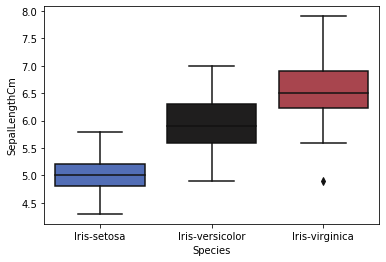

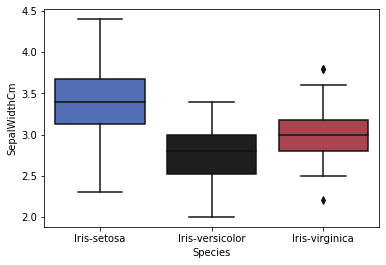

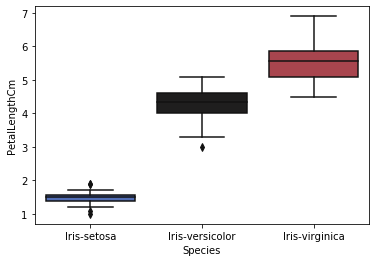

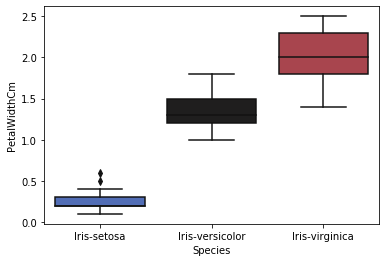

In [348]:
features = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
for feature in features:
    sns.boxplot(x='Species',y=feature,data = df, palette='icefire')
    plt.show()

## Corelation Matrix


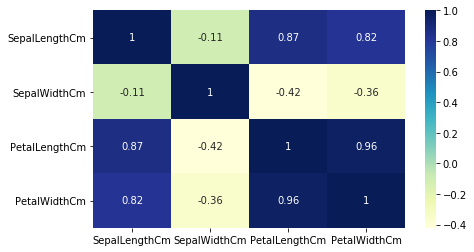

In [349]:
plt.figure(figsize=(7,4))
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')

In [350]:
#Checking Null Values

df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### Pair Plot

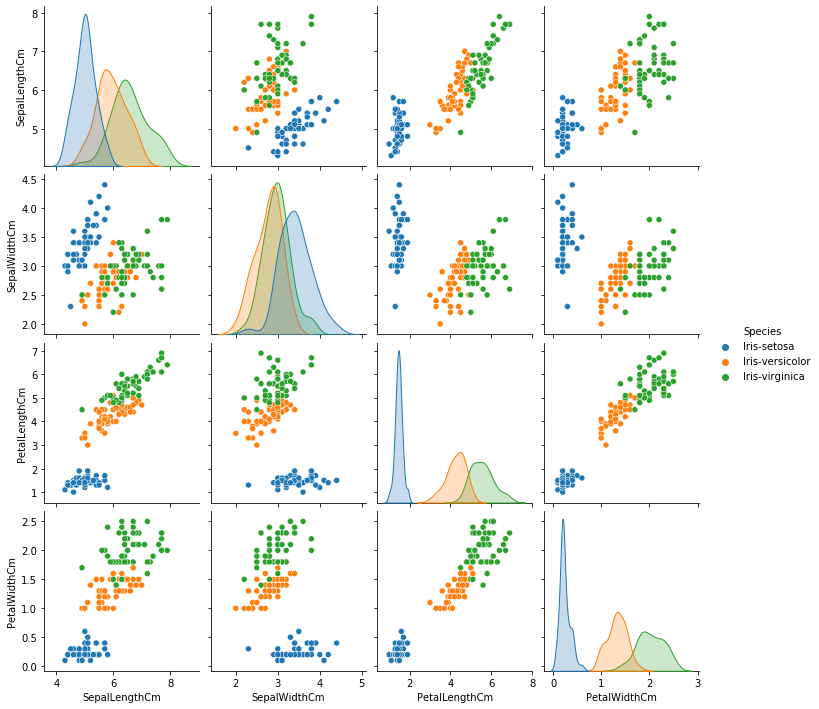

In [351]:
sns.pairplot(df, hue='Species')

### Subplot of all columns

In [352]:
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

Text(0.5, 1.0, 'Petal Width')

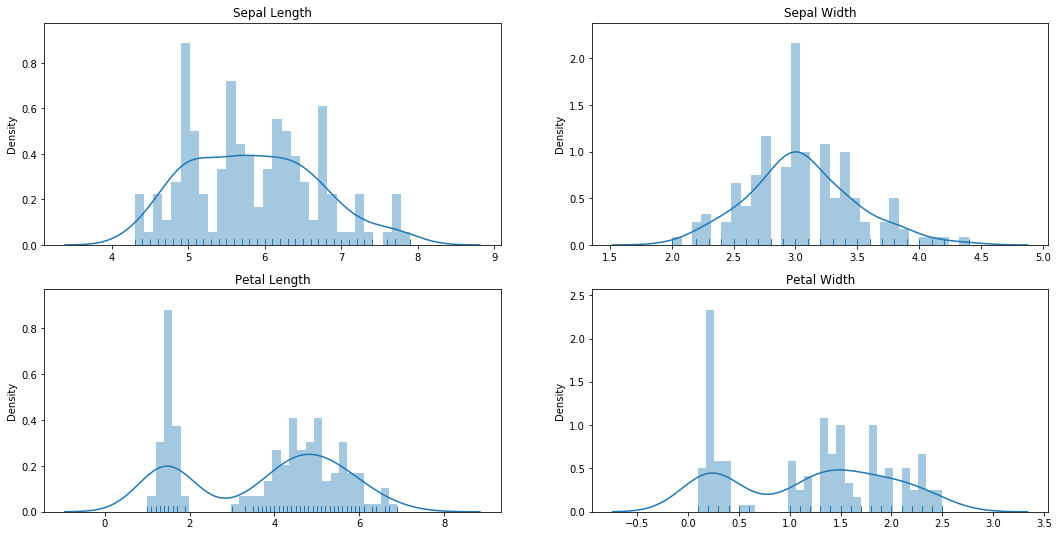

In [353]:
# It plots subplots of all columns based on selection and divisionof region 
plt.figure(figsize=(18,9))
plt.subplot(2,2,1)
sns.distplot(df['SepalLengthCm'].values,bins=30, kde=True, rug=True )
plt.title('Sepal Length')
plt.subplot(2,2,2)
sns.distplot(df['SepalWidthCm'].values,bins=30, kde=True, rug=True )
plt.title('Sepal Width')
plt.subplot(2,2,3)
sns.distplot(df['PetalLengthCm'].values,bins=30, kde=True, rug=True )
plt.title('Petal Length')
plt.subplot(2,2,4)
sns.distplot(df['PetalWidthCm'].values,bins=30, kde=True, rug=True )
plt.title('Petal Width')

In [354]:
# Seprating Dependent and Independent varibles
x=df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
y=df['Species']

In [355]:
from sklearn.preprocessing import LabelEncoder
lbe= LabelEncoder()
y=lbe.fit_transform(y)

In [356]:
# Creating training and test data using train_test_split method
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=0.2,random_state=42)
print("Shape of feature training data :",xtrain.shape)
print("Shape of target training data :",ytrain.shape)
print("Shape of feature test data :",xtest.shape)
print("Shape of target test data :",ytest.shape)

Shape of feature training data : (120, 4)
Shape of target training data : (120,)
Shape of feature test data : (30, 4)
Shape of target test data : (30,)


In [357]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dtree= DecisionTreeClassifier()
dtree.fit(xtrain,ytrain)# Fitting the model on training data

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [358]:
ypred=dtree.predict(xtest)  # Prediction on the testing data.
ypred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [359]:
#Accuracy, Confusion Matrix and classification report of the model
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report

In [360]:
#Classification Report
print("Classification Report is:\n")
print(classification_report(ytest,ypred))


Classification Report is:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## Accuracy of Training Data


Accuracy of training data :  100.0 %
Confusin matrix of training data :'
'  [[40  0  0]
 [ 0 41  0]
 [ 0  0 39]]


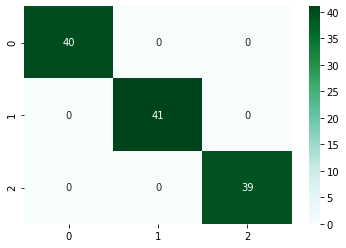

In [361]:
predict = dtree.predict(xtrain)
print("Accuracy of training data : ",accuracy_score(predict,ytrain)*100,"%")
print("Confusin matrix of training data :'\n' ",confusion_matrix(predict,ytrain))
sns.heatmap(confusion_matrix(predict,ytrain),annot = True,cmap = 'BuGn')

## Accuracy of Testing Data

Accuracy of testing data :  100.0 %
Confusin matrix of testing data :
  [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


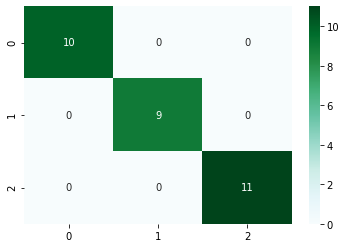

In [362]:
predict = dtree.predict(xtest)
print("Accuracy of testing data : ",accuracy_score(predict,ytest)*100,"%")
print("Confusin matrix of testing data :\n ",confusion_matrix(predict,ytest))
sns.heatmap(confusion_matrix(predict,ytest),annot = True,cmap = 'BuGn')

# Visualize Decision Tree

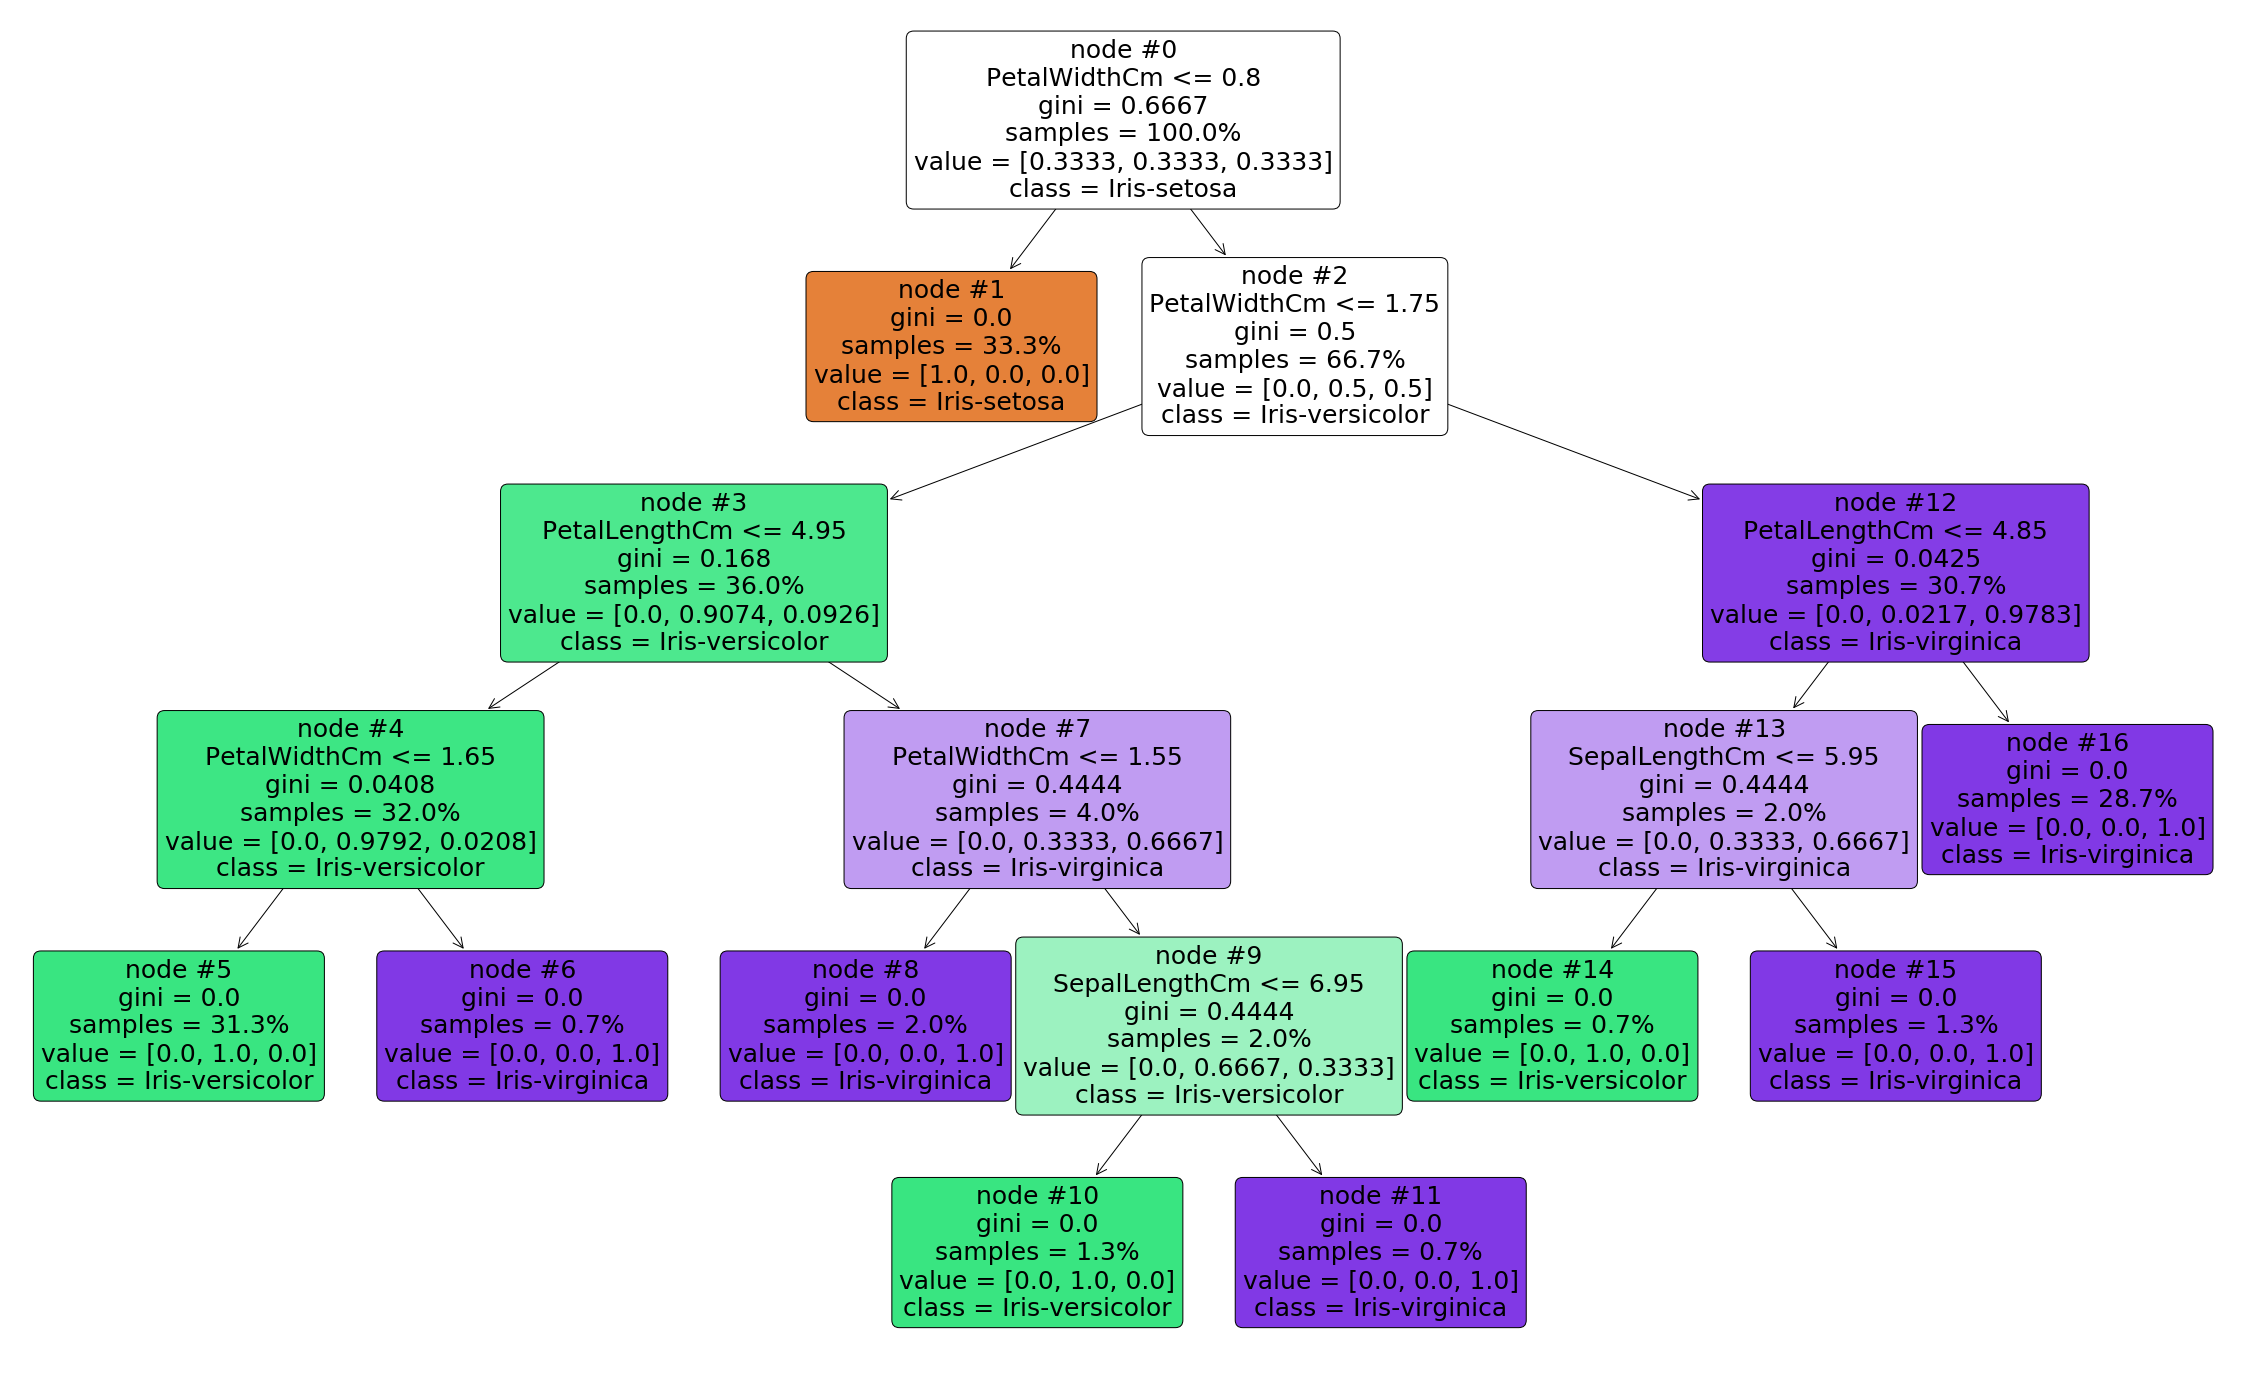

In [363]:
from sklearn.tree import plot_tree
plt.figure(figsize=(40,25))
tree_img = plot_tree(dtree.fit(x,y),feature_names=df.columns,class_names=df['Species'].unique().tolist(),filled=True,precision=4,node_ids = True, label="all",proportion=True,rounded=True,fontsize=25)
plt.show()

###### Accuracy is 100 Percent. 